# Models v4 Onward

Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

%matplotlib inline

Reading csvs

In [3]:
sub_df = pd.read_csv('data/submission_format.csv')
test_vals = pd.read_csv('data/test_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')
train_vals = pd.read_csv('data/training_set_values.csv')
train_df = pd.read_csv('data/clean_train.csv')

### Viewing head, info, and some value_counts

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55973 entries, 0 to 55972
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         55973 non-null  int64  
 1   id                 55973 non-null  int64  
 2   amount_tsh         55973 non-null  float64
 3   date_recorded      55973 non-null  object 
 4   gps_height         55973 non-null  int64  
 5   longitude          55973 non-null  float64
 6   latitude           55973 non-null  float64
 7   wpt_name           55973 non-null  object 
 8   basin              55973 non-null  object 
 9   subvillage         55973 non-null  object 
 10  region             55973 non-null  object 
 11  region_code        55973 non-null  int64  
 12  district_code      55973 non-null  int64  
 13  lga                55973 non-null  object 
 14  ward               55973 non-null  object 
 15  population         55973 non-null  int64  
 16  permit             559

# ONE HOT ENCONDING

In [5]:
#What are the categorical columns
categorical = ['basin', 'region', 'lga', 'extraction_type', 
               'management', 'payment_type', 'water_quality', 'quantity', 'source_type', 'source_class', 
               'waterpoint_type']

#What are the continous columns
continuous = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 
              'permit', 'construction_year', 'status_group']

#What is the target group
target = 'status_group'

In [6]:
cat_df = train_df[categorical]
cont_df = train_df[continuous]

In [7]:
#num of unique values in 
c = 0
for column in cat_df:
    print(column,":",len(train_df[column].unique()))
    c+= len(train_df[column].unique())

basin : 9
region : 21
lga : 121
extraction_type : 18
management : 12
payment_type : 7
water_quality : 8
quantity : 5
source_type : 7
source_class : 3
waterpoint_type : 7


In [8]:
#instantiate OHE
ohe = OneHotEncoder()

#fit_transform
X_cat = ohe.fit_transform(cat_df).toarray()

X_cat = pd.DataFrame(X_cat, columns = ohe.get_feature_names_out(categorical))

In [9]:
X_cat

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Rural,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [10]:
#Reset the indexes 
X_cat = X_cat.reset_index(drop=True)
cont_df = cont_df.reset_index(drop=True)

#combine the OHE categorical and continuous data back into one dataset
data_onehot = pd.concat([cont_df,X_cat], axis=1, ignore_index=True)


In [11]:
data_onehot.columns =list(cont_df.columns) + list(X_cat.columns)

In [12]:
data_onehot

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,permit,construction_year,status_group,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Rural,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,1390,34.938093,-9.856322,11,5,109,False,1999,functional,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [13]:
#Assign X and y
X = data_onehot.drop(['status_group'], axis=1)
y = data_onehot['status_group']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Decision Tree

In [14]:
#Function to plot feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

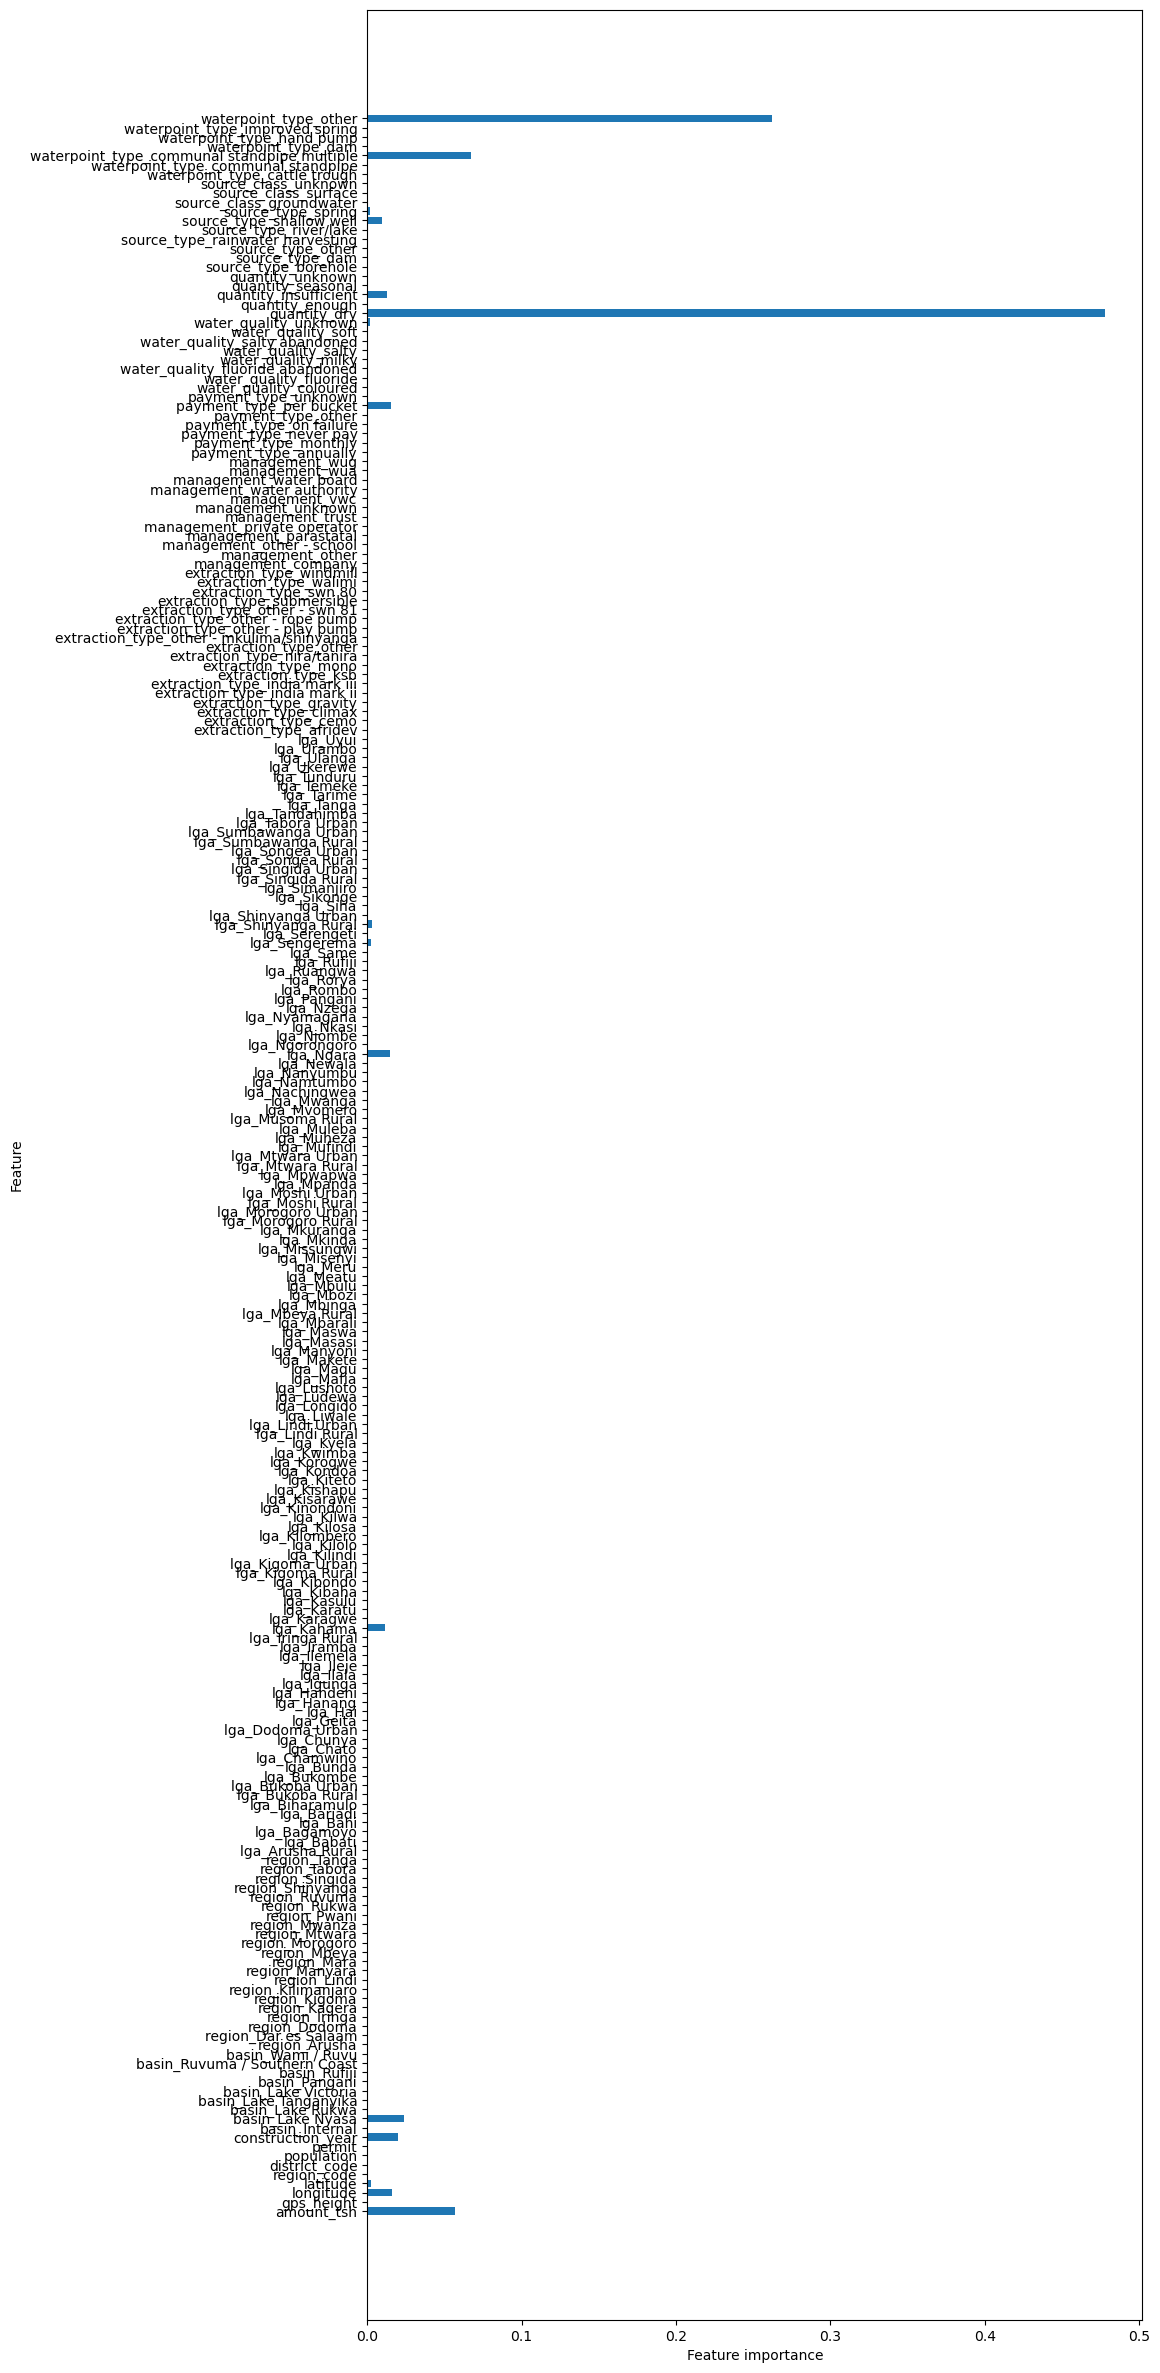

In [15]:
# Instantiate and fit a DecisionTreeClassifier with optimal parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_impurity_decrease=0.0, min_samples_split=5) 
tree_clf.fit(X_train, y_train)

plot_feature_importances(tree_clf)

In [16]:
myClassifiers = pd.Series(tree_clf.feature_importances_, index=X_train.columns)
myClassifiers.sort_values(ascending=False, inplace=True)
print(myClassifiers.head(20))

quantity_dry                                   0.478169
waterpoint_type_other                          0.262272
waterpoint_type_communal standpipe multiple    0.067309
amount_tsh                                     0.056559
basin_Lake Nyasa                               0.023574
construction_year                              0.020012
longitude                                      0.016070
payment_type_per bucket                        0.015602
lga_Ngara                                      0.014686
quantity_insufficient                          0.012817
lga_Kahama                                     0.011530
source_type_shallow well                       0.009308
lga_Shinyanga Rural                            0.002736
lga_Sengerema                                  0.002559
latitude                                       0.002351
source_type_spring                             0.001871
water_quality_unknown                          0.001607
extraction_type_nira/tanira                    0

In [17]:
y_pred = tree_clf.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)
print('The Decision Tree model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with dummies has an accuracy of 71.5 %


In [ ]:
'quantity_dry', 'waterpoint_type_other', 'waterpoint_type_communal standpipe multiple', 'amount_tsh', 'basin_Lake Nyasa', 'construction_year', 'longitude', 'payment_type_per bucket', 'lga_Ngara', 'quantity_insufficient',

In [28]:
#Using top 10 Feature Classifiers including Longitude
df10_latlong = data_onehot[['quantity_dry', 'waterpoint_type_other', 'waterpoint_type_communal standpipe multiple', 
                            'amount_tsh', 'basin_Lake Nyasa', 'construction_year', 'longitude', 
                            'payment_type_per bucket', 'lga_Ngara', 'quantity_insufficient','status_group']]

X = df10_latlong.drop('status_group', axis=1)
y = df10_latlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with dummies has an accuracy of 71.2 %


In [29]:
#Using top 10 Feature Classifiers EXCLUDING Longitude
df10_no_latlong = data_onehot[['quantity_dry', 'waterpoint_type_other', 'waterpoint_type_communal standpipe multiple',
                               'amount_tsh', 'basin_Lake Nyasa', 'construction_year', 'payment_type_per bucket', 
                               'lga_Ngara', 'quantity_insufficient','lga_Kahama', 'status_group']]

X = df10_no_latlong.drop('status_group', axis=1)
y = df10_no_latlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with dummies has an accuracy of 72.6 %


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

#instantiate RandomForest
forest = RandomForestClassifier(max_depth=20, n_estimators=50)

#fit to training
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [19]:
#Random Forest accuracy score for training
forest.score(X_train, y_train)

0.896042205267251

In [20]:
y_pred = forest.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)
print('The Random Forest model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Random Forest model with dummies has an accuracy of 81.2 %


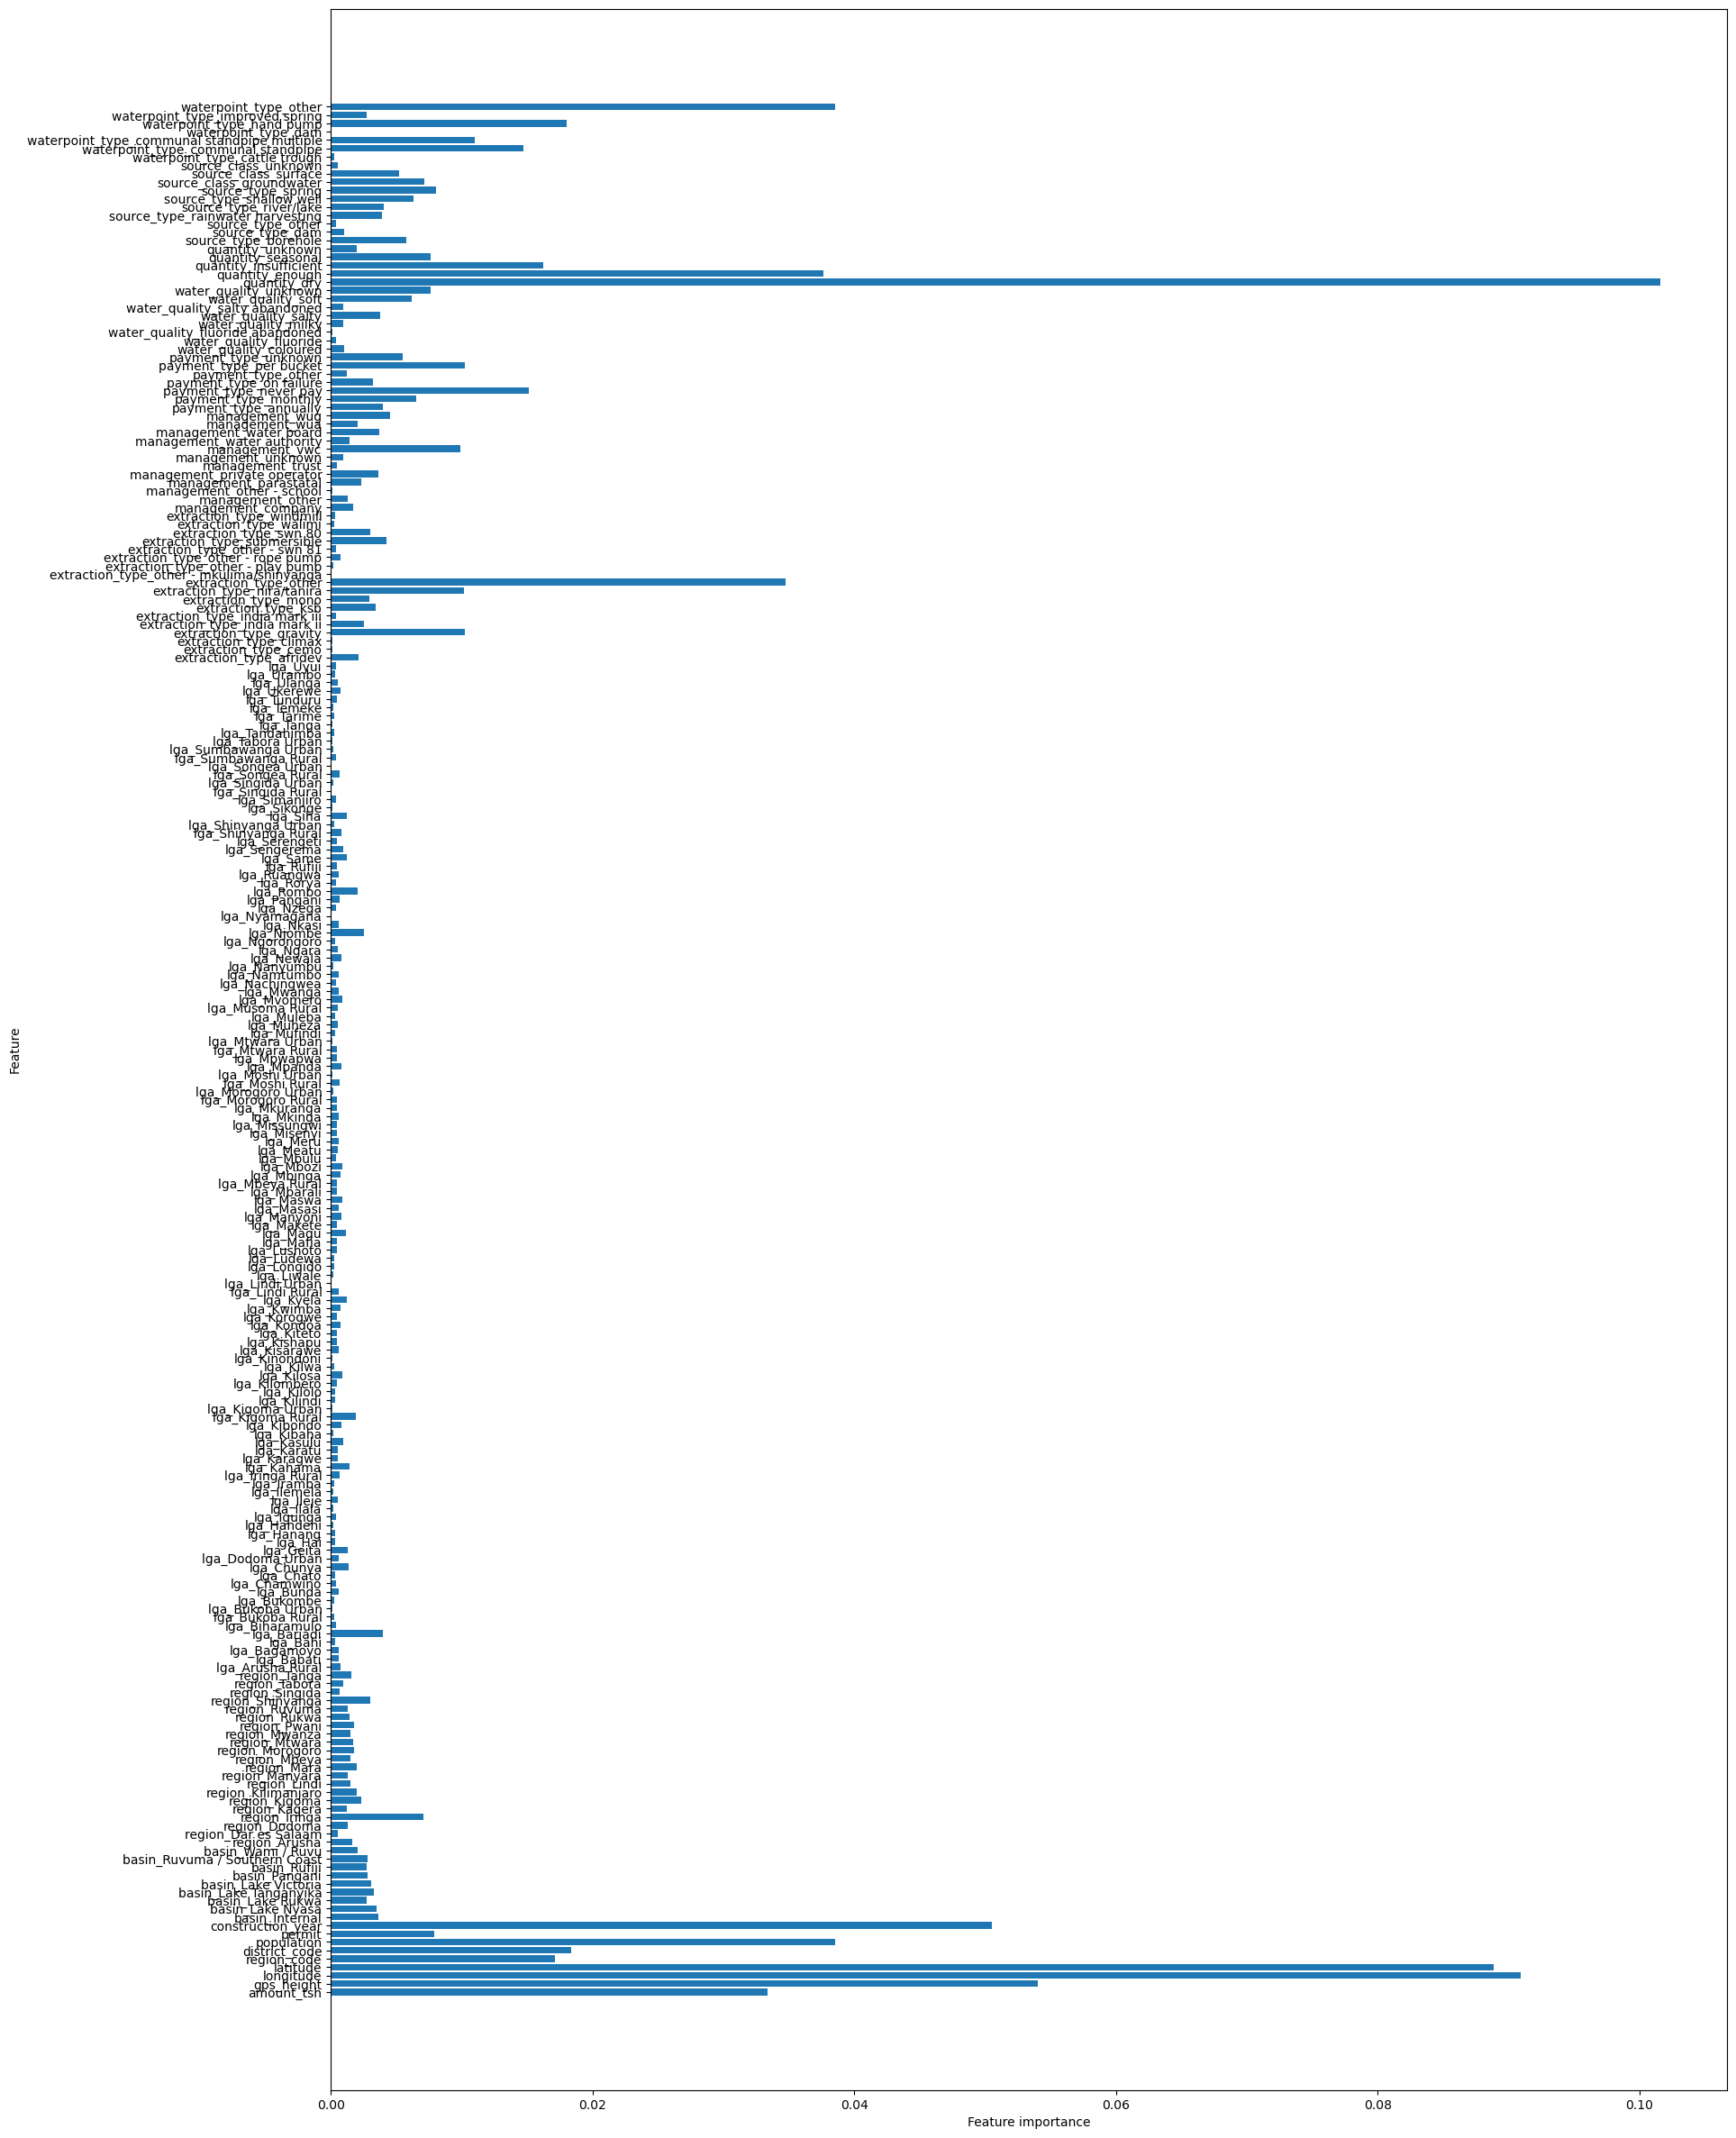

In [21]:
def plot_feature_importances(forest):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,30))
    plt.barh(range(n_features), forest.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

In [22]:
myClassifiers = pd.Series(forest.feature_importances_, index=X_train.columns)
myClassifiers.sort_values(ascending=False, inplace=True)
print(myClassifiers.head(20))

quantity_dry                                   0.101637
longitude                                      0.090899
latitude                                       0.088871
gps_height                                     0.054030
construction_year                              0.050499
population                                     0.038569
waterpoint_type_other                          0.038509
quantity_enough                                0.037662
extraction_type_other                          0.034783
amount_tsh                                     0.033402
district_code                                  0.018373
waterpoint_type_hand pump                      0.017990
region_code                                    0.017122
quantity_insufficient                          0.016257
payment_type_never pay                         0.015132
waterpoint_type_communal standpipe             0.014694
waterpoint_type_communal standpipe multiple    0.011022
extraction_type_gravity                        0

In [25]:
#Using top 10 Feature Classifiers EXCLUDING Longitude/Latitude
df10_no_latlong = data_onehot[['quantity_dry', 'gps_height', 'construction_year', 'quantity_enough',
                            'waterpoint_type_other', 'population', 'extraction_type_other', 'amount_tsh',
                            'district_code', 'quantity_insufficient', 'status_group']]

X = df10_no_latlong.drop('status_group', axis=1)
y = df10_no_latlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

forest = RandomForestClassifier(max_depth=20, n_estimators=50)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Random Forest model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Random Forest model with dummies has an accuracy of 76.6 %


In [27]:
#Using top 10 Feature Classifiers including Longitude/Latitude
df10_latlong = data_onehot[['longitude', 'latitude', 'quantity_dry', 'gps_height', 'construction_year', 'quantity_enough', 
                      'waterpoint_type_other', 'population', 'extraction_type_other', 'amount_tsh', 'status_group']]

X = df10_latlong.drop('status_group', axis=1)
y = df10_latlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

forest = RandomForestClassifier(max_depth=20, n_estimators=50)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Random Forest model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Random Forest model with dummies has an accuracy of 79.5 %


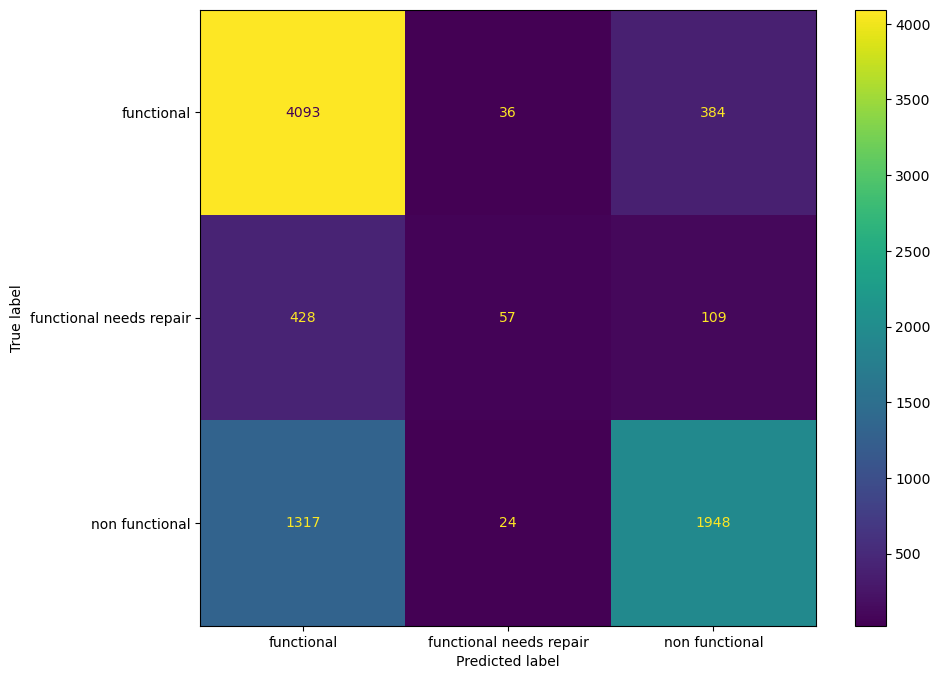

In [30]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=dt.classes_), display_labels=forest.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()

## Decision Tree with Dummy Attributes | 75.1%
'construction_year', 'waterpoint_type', 'quantity', 'water_quality', 'extraction_type', 'management', 'permit', 'basin', 'status_group'

In [4]:
dt_mini_df = train_df[['construction_year', 'waterpoint_type', 'quantity', 'water_quality',
                             'extraction_type', 'management', 'permit', 'basin', 'status_group']]

dt_mini_df = pd.get_dummies(dt_mini_df, columns=['waterpoint_type', 'water_quality', 'extraction_type', 'quantity',
                                                'management', 'permit', 'basin']).drop('extraction_type_other - mkulima/shinyanga', axis=1)
# print(dt_mini_df.columns)

X = dt_mini_df.drop('status_group', axis=1)
y = dt_mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with dummies has an accuracy of 76.0 %


### Confusion Matrix

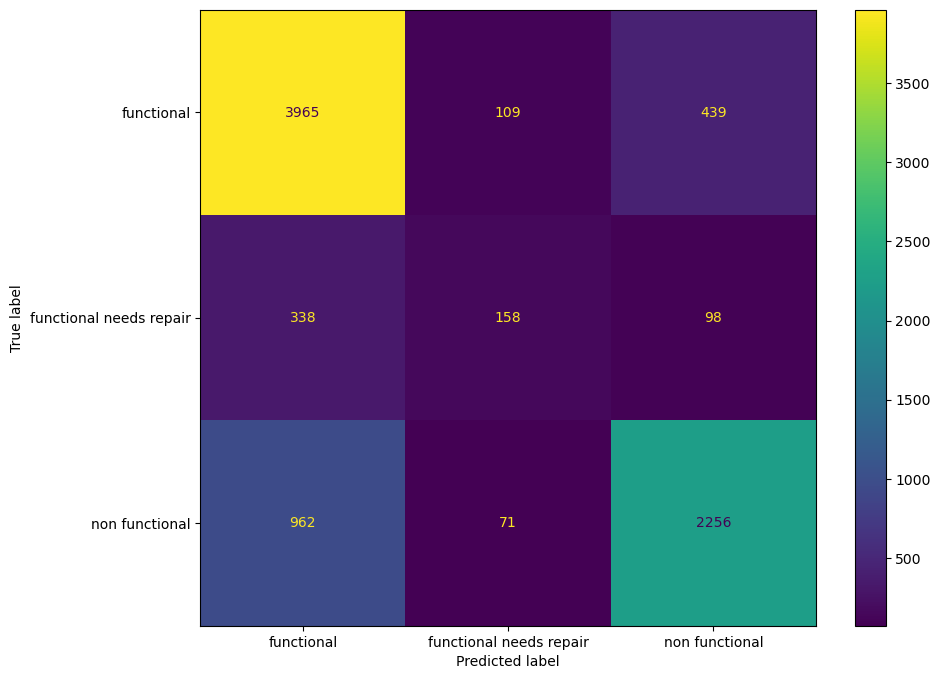

In [5]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=dt.classes_), display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()

# MAKING A SUBMISSION

Predicting on the test data and creating the csv file

In [12]:
test_vals_submit = pd.get_dummies(test_vals, columns=['waterpoint_type', 'water_quality', 'extraction_type', 
                                                      'quantity', 'management', 'permit', 'basin'])

y_pred_submit = dt.predict(test_vals_submit[['construction_year', 'waterpoint_type_cattle trough',
                                           'waterpoint_type_communal standpipe',
                                           'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
                                           'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
                                           'waterpoint_type_other', 'water_quality_coloured',
                                           'water_quality_fluoride', 'water_quality_fluoride abandoned',
                                           'water_quality_milky', 'water_quality_salty',
                                           'water_quality_salty abandoned', 'water_quality_soft',
                                           'water_quality_unknown', 'extraction_type_afridev',
                                           'extraction_type_cemo', 'extraction_type_climax',
                                           'extraction_type_gravity', 'extraction_type_india mark ii',
                                           'extraction_type_india mark iii', 'extraction_type_ksb',
                                           'extraction_type_mono', 'extraction_type_nira/tanira',
                                           'extraction_type_other', 'extraction_type_other - play pump',
                                           'extraction_type_other - rope pump', 'extraction_type_other - swn 81',
                                           'extraction_type_submersible', 'extraction_type_swn 80',
                                           'extraction_type_walimi', 'extraction_type_windmill', 'quantity_dry',
                                           'quantity_enough', 'quantity_insufficient', 'quantity_seasonal',
                                           'quantity_unknown', 'management_company', 'management_other',
                                           'management_other - school', 'management_parastatal',
                                           'management_private operator', 'management_trust', 'management_unknown',
                                           'management_vwc', 'management_water authority',
                                           'management_water board', 'management_wua', 'management_wug',
                                           'permit_False', 'permit_True', 'basin_Internal', 'basin_Lake Nyasa',
                                           'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria',
                                           'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast',
                                           'basin_Wami / Ruvu']])

In [13]:
submission1_df = pd.concat([test_vals['id'].reset_index(drop=True), 
                            pd.Series(y_pred_submit).reset_index(drop=True)], 
                           axis=1).rename(columns={0:'status_group'})
submission1_df.rename(columns={0:'status_group'})

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


### Creating submission csv files

In [ ]:
sub_name = ''
# submission1_df.to_csv('submissions/submission' + sub_name + '.csv', index=False)  